# Explore Workbook for Justin

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import acquire
import prepare
import explore

## Explore Equipment Rail

**Acquire**

In [2]:
df = acquire.get_equiprail()
df.shape

(22402, 146)

**Prepare**

In [3]:
df = prepare.prep_equip_df(df)
df.shape

(11504, 35)

In [ ]:
#Create lat and long data frame for tableau viz of equipment accidents

#equip_coordinates = df[['railroad_company','lat', 'long']]
#equip_coordinates.head()
#equip_coordinates.to_excel("equip_coordinates.xlsx")

In [ ]:
#def drop_under_represented_rr(df): 
#    '''
#    This function takes in a railroad accident data frame
#    and drops any observations representing railroad companies
#    where the railroad company has less than 300 accidents in the dataframe
#    
#    It returns a single dataframe
#    '''
#    
#    #Define the value counts for railroad_company in the dataframe
#    value_counts = df['railroad_company'].value_counts()
#    
#    #Select the observations to remove based on railroad_company count representation threshold
#    to_remove = value_counts[value_counts < 300].index
#    
#    # Keep rows where the railroad_company column is not in to_remove if n was defined
#    if 300 > 0:
#        df = df[~df.railroad_company.isin(to_remove)]
#    else: 
#        df = df 
#        
#    return df

In [ ]:
#df = drop_ur_rr(df)
#df.shape

**Explore some stats for impact of equipment rail accidents**

**What are Equipment Rail Accidents?**

**Explore Univariate**

In [ ]:
#def explore_univariate(train, cat_vars, quant_vars):
#    for var in cat_vars:
#        explore_univariate_categorical(train, var)
#        print('_________________________________________________________________')
#    for col in quant_vars:
#        p, descriptive_stats = explore_univariate_quant(train, col)
#        plt.show(p)
#        print(descriptive_stats)
#        
#def explore_univariate_categorical(train, cat_var):
#    '''
#    takes in a dataframe and a categorical variable and returns
#    a frequency table and barplot of the frequencies. 
#    '''
#    frequency_table = freq_table(train, cat_var)
#    plt.figure(figsize=(2,2))
#    sns.barplot(x=cat_var, y='Count', data=frequency_table, color='white', edgecolor='grey')
#    plt.title(cat_var)
#    plt.show()
#    print(frequency_table)
#
#def explore_univariate_quant(train, quant_var):
#    '''
#    takes in a dataframe and a quantitative variable and returns
#    descriptive stats table, histogram, and boxplot of the distributions. 
#    '''
#    descriptive_stats = train[quant_var].describe()
#    plt.figure(figsize=(8,2))
#
#    p = plt.subplot(1, 2, 1)
#    p = plt.hist(train[quant_var], color='white', edgecolor='grey')
#    p = plt.title(quant_var)
#
#    # second plot: box plot
#    p = plt.subplot(1, 2, 2)
#    p = plt.boxplot(train[quant_var])
#    p = plt.title(quant_var)
#    return p, descriptive_stats
#    
#def freq_table(train, cat_var):
#    '''
#    for a given categorical variable, compute the frequency count and percent split
#    and return a dataframe of those values along with the different classes. 
#    '''
#    class_labels = list(train[cat_var].unique())
#
#    frequency_table = (
#        pd.DataFrame({cat_var: class_labels,
#                      'Count': train[cat_var].value_counts(normalize=False), 
#                      'Percent': round(train[cat_var].value_counts(normalize=True)*100,2)}
#                    )
#    )
#    return frequency_table

In [ ]:
cat_vars = ["railroad_company", "train_type", "cause", "typrr"]
quant_vars = ["accident_type", "state", "temp", "visibility", "weather", "train_speed", "train_direction", 
             "train_weight", "equip_damage", "track_damage"]

In [ ]:
explore.explore_univariate(df, cat_vars, quant_vars)

**Takeaways:**
    - Outlier in train speed? What train travels at 545 mph?
    - What is going on with the State column? Expected 50 but shows 56. Are the 6 extra representing terratories in the US?
    - Track Damages and Equip damages have outliers which is expected    

**More Univariate Exploration**

In [ ]:
df.info()

In [ ]:
cat_vars = ["railroad_company", "train_type", "cause", "typrr"]
quant_vars = ["total_killed", "total_injured", "max_speed", "total_damage", 
              "engineers_onduty", "conductors_onduty", "brakemen_onduty", "region",
             "signal_type"]

In [ ]:
explore.explore_univariate(df, cat_vars, quant_vars)

**Takeaways:**
    - What does signal feature mean? The majority of the equip accidents are classified as not signaled...but what does that actually mean?
    

---

**Explore Outliers**

In [6]:
def outlier_report(df):
    '''
    This function takes in a data frame and returns
    print statments stating the upper and lower bound outliers for 
    each column
    '''
    
    columns_to_check = ["temp",
                        "train_speed",
                        "train_weight",
                        "equip_damage",
                        "track_damage","total_killed", "total_injured", "max_speed", "total_damage", 
                        "engineers_onduty", "conductors_onduty", "brakemen_onduty"]
    
    for col in columns_to_check:
        quartile_01, quartile_03 = np.percentile(df[col], [25, 75])
        iqr = quartile_03 - quartile_01
    
        lower_bound = round(quartile_01 -(2 * iqr), 3)
        upper_bound = round(quartile_03 +(2 * iqr), 3)
    
        #df['outlier'] = df[col].apply(lambda x: outlier_label(x, lower_bound, upper_bound))
    

        print(f"The lower and upper bound of the range for '{col}' respectively is: {lower_bound} and {upper_bound}")

In [7]:
outlier_report(df)

The lower and upper bound of the range for 'temp' respectively is: -26.0 and 144.0
The lower and upper bound of the range for 'train_speed' respectively is: -26.0 and 49.0
The lower and upper bound of the range for 'train_weight' respectively is: -13366.0 and 20049.0
The lower and upper bound of the range for 'equip_damage' respectively is: -67789.75 and 126031.5
The lower and upper bound of the range for 'track_damage' respectively is: -54594.5 and 82034.25
The lower and upper bound of the range for 'total_killed' respectively is: 0.0 and 0.0
The lower and upper bound of the range for 'total_injured' respectively is: 0.0 and 0.0
The lower and upper bound of the range for 'max_speed' respectively is: -26.0 and 49.0
The lower and upper bound of the range for 'total_damage' respectively is: -127095.0 and 234898.75
The lower and upper bound of the range for 'engineers_onduty' respectively is: 1.0 and 1.0
The lower and upper bound of the range for 'conductors_onduty' respectively is: 1.0 a

In [8]:
def visualize_outliers(df):
    '''
    This function takes in a dataframe
    and outputs boxplots to show outlier distribution
    for each column in the the dataframe
    '''
    cols_to_check = ["temp",
                    "train_speed",
                    "train_weight",
                    "equip_damage",
                    "track_damage","total_killed", "total_injured", "max_speed", "total_damage", 
                    "engineers_onduty", "conductors_onduty", "brakemen_onduty"]
    for col in cols_to_check:
        sns.boxplot(df[col])
        plt.title(col)
        plt.show()

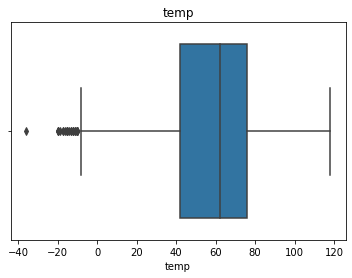

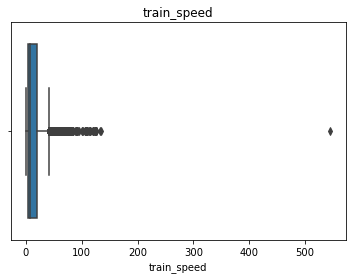

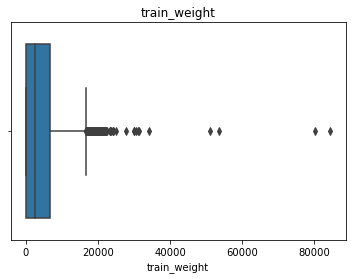

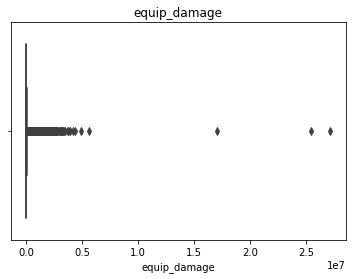

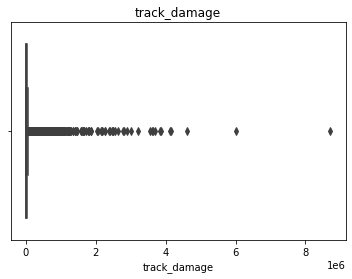

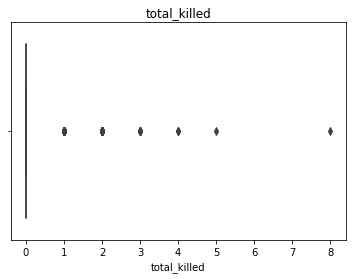

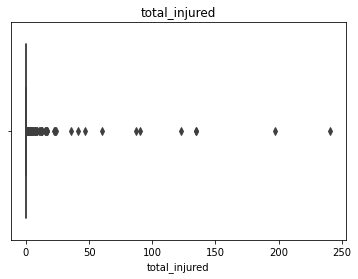

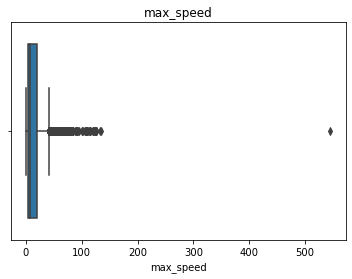

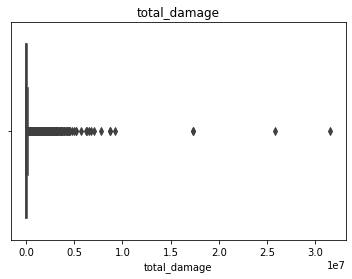

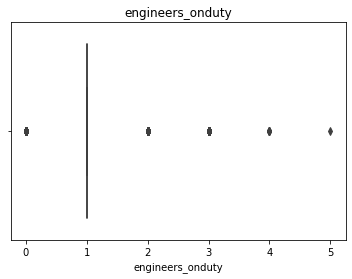

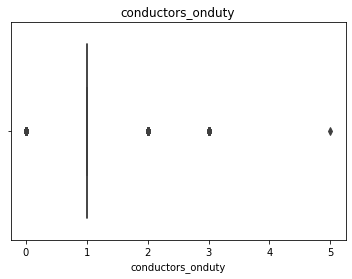

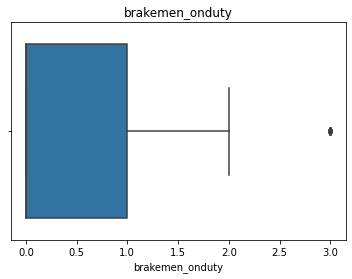

In [9]:
visualize_outliers(df)

**Drop Outliers in Total_Damage**

In [23]:
df = df[df.total_damage < 234898.75]
df.shape

(10100, 35)

**Takeaways:**
   - Need to investigate outliers in:
        - max_speed & train speed...one over 500 mph
        - train weight
        - one super negative temp

**Split the Data**

In [24]:
train, validate, test = explore.train_validate_test_split(df, 'railroad_company', seed=444)
print(f'Train Shape: {train.shape}')
print(f'Validate Shape: {validate.shape}')
print(f'Test Shape: {test.shape}')

Train Shape: (5656, 35)
Validate Shape: (2424, 35)
Test Shape: (2020, 35)


**Is there a time of year where rail equipment accidents happen with more or less frequency?**

In [ ]:
#train['month'] = pd.DatetimeIndex(train['date']).month
#train.head()

In [ ]:
#train.month.hist()

In [ ]:
#train['season'] = train.month.apply(lambda x: "winter/fall" if x == 10 or 11 == 12 or x == 1 or x == 2 or x == 3 else "summer/spring")
#train.head()
        

In [ ]:
#train.season.hist()

**Takeaways:**
- Rail equipment accidents appear to happen more frequently in summer/spring months than in winter/fall months 

**What is the distribution of track damages?**

<AxesSubplot:>

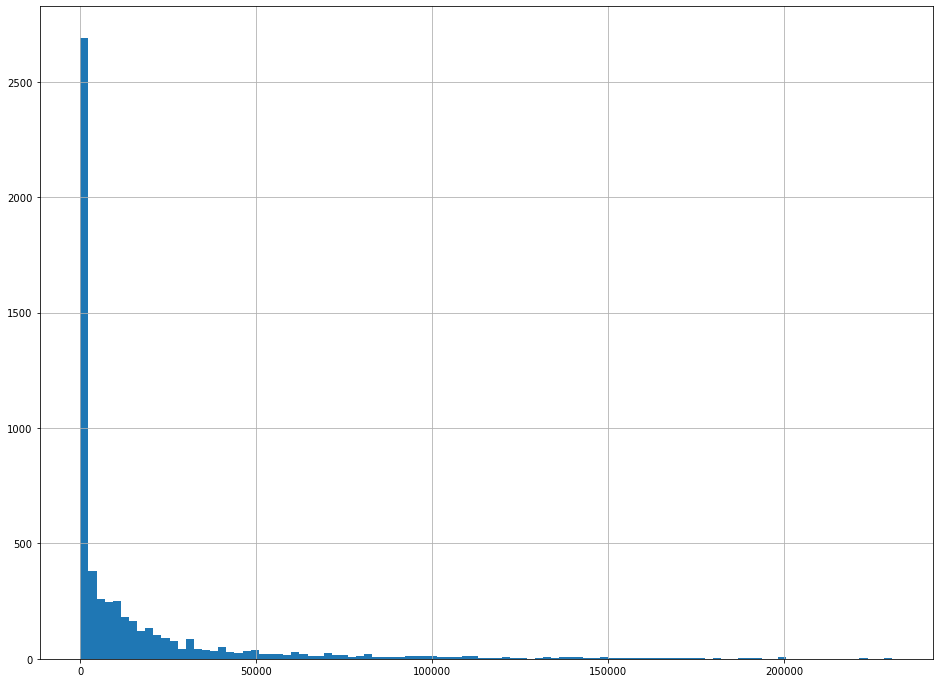

In [25]:
plt.figure(figsize=(16,12))
train.track_damage.hist(bins=100)

---

**What is the distribution of total_damage?**

<AxesSubplot:>

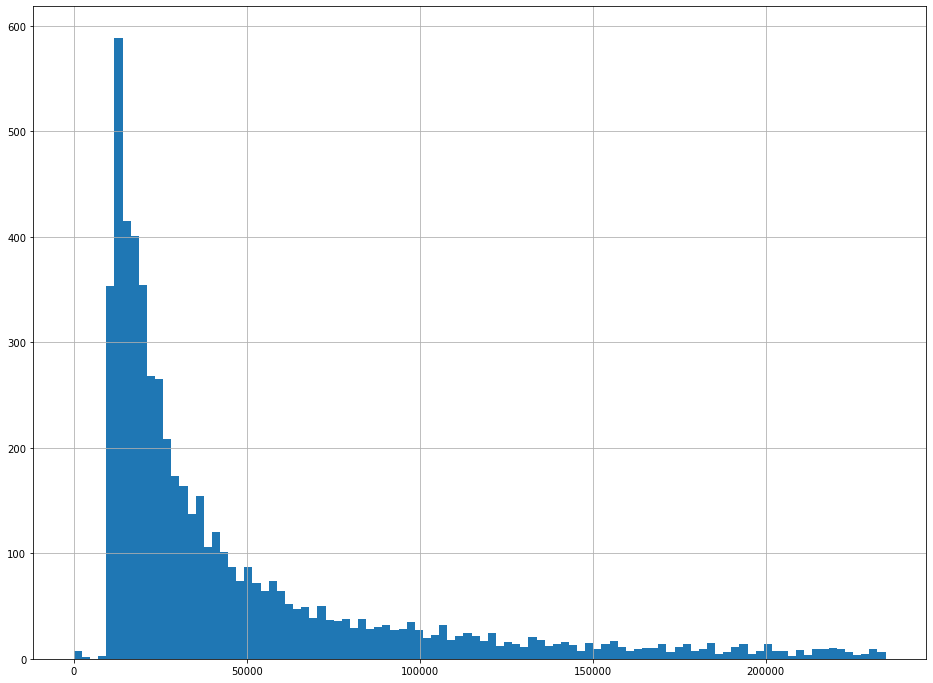

In [26]:
plt.figure(figsize=(16,12))
train.total_damage.hist(bins=100)

**Explore Bivariate**

In [ ]:
def explore_bivariate(train, target, cat_vars, quant_vars):
    for cat in cat_vars:
        explore_bivariate_categorical(train, 'railroad_company', cat)
    for quant in quant_vars:
        explore_bivariate_quant(train, 'railroad_company', quant)


### Univariate

def explore_univariate_categorical(train, cat_var):
    '''
    takes in a dataframe and a categorical variable and returns
    a frequency table and barplot of the frequencies. 
    '''
    frequency_table = freq_table(train, cat_var)
    plt.figure(figsize=(2,2))
    sns.barplot(x=cat_var, y='Count', data=frequency_table, color='white', edgecolor='grey')
    plt.title(cat_var)
    plt.show()
    print(frequency_table)

def explore_univariate_quant(train, quant_var):
    '''
    takes in a dataframe and a quantitative variable and returns
    descriptive stats table, histogram, and boxplot of the distributions. 
    '''
    descriptive_stats = train[quant_var].describe()
    plt.figure(figsize=(8,2))

    p = plt.subplot(1, 2, 1)
    p = plt.hist(train[quant_var], color='white', edgecolor='grey')
    p = plt.title(quant_var)

    # second plot: box plot
    p = plt.subplot(1, 2, 2)
    p = plt.boxplot(train[quant_var])
    p = plt.title(quant_var)
    return p, descriptive_stats
    
def freq_table(train, cat_var):
    '''
    for a given categorical variable, compute the frequency count and percent split
    and return a dataframe of those values along with the different classes. 
    '''
    class_labels = list(train[cat_var].unique())

    frequency_table = (
        pd.DataFrame({cat_var: class_labels,
                      'Count': train[cat_var].value_counts(normalize=False), 
                      'Percent': round(train[cat_var].value_counts(normalize=True)*100,2)}
                    )
    )
    return frequency_table


#### Bivariate

def explore_bivariate_categorical(train, target, cat_var):
    '''
    takes in categorical variable and binary target variable, 
    returns a crosstab of frequencies
    runs a chi-square test for the proportions
    and creates a barplot, adding a horizontal line of the overall rate of the target. 
    '''
    print(cat_var, "\n_____________________\n")
    ct = pd.crosstab(train[cat_var], train[target], margins=True)
    chi2_summary, observed, expected = run_chi2(train, cat_var, target)
   # p = plot_cat_by_target(train, target, cat_var)
    
    print(chi2_summary)
    print("\nobserved:\n", ct)
    print("\nexpected:\n", expected)
    #plt.show(p)
    print("\n_____________________\n")

def explore_bivariate_quant(train, target, quant_var):
    '''
    descriptive stats by each target class. 
    compare means across 2 target groups 
    boxenplot of target x quant
    swarmplot of target x quant
    '''
    print(quant_var, "\n____________________\n")
    descriptive_stats = train.groupby(target)[quant_var].describe()
    average = train[quant_var].mean()
    mann_whitney = compare_means(train, target, quant_var)
    plt.figure(figsize=(4,4))
    boxen = plot_boxen(train, target, quant_var)
    swarm = plot_swarm(train, target, quant_var)
    plt.show()
    print(descriptive_stats, "\n")
    print("\nMann-Whitney Test:\n", mann_whitney)
    print("\n____________________\n")

## Bivariate Categorical

def run_chi2(train, cat_var, target):
    observed = pd.crosstab(train[cat_var], train[target])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    chi2_summary = pd.DataFrame({'chi2': [chi2], 'p-value': [p], 
                                 'degrees of freedom': [degf]})
    expected = pd.DataFrame(expected)
    return chi2_summary, observed, expected

#def plot_cat_by_target(train, target, cat_var):
#    p = plt.figure(figsize=(2,2))
#    p = sns.barplot(cat_var, target, data=train, alpha=.8, color='lightseagreen')
#    overall_rate = train[target].mean()
#    p = plt.axhline(overall_rate, ls='--', color='gray')
#    return p
    

## Bivariate Quant

def plot_swarm(train, target, quant_var):
    average = train[quant_var].mean()
    p = sns.swarmplot(data=train, x=target, y=quant_var, color='lightgray')
    p = plt.title(quant_var)
    p = plt.axhline(average, ls='--', color='black')
    return p

def plot_boxen(train, target, quant_var):
    average = train[quant_var].mean()
    p = sns.boxenplot(data=train, x=target, y=quant_var, color='lightseagreen')
    p = plt.title(quant_var)
    p = plt.axhline(average, ls='--', color='black')
    return p

# alt_hyp = ‘two-sided’, ‘less’, ‘greater’

def compare_means(train, target, quant_var, alt_hyp='two-sided'):
    x = train[train[target]==0][quant_var]
    y = train[train[target]==1][quant_var]
    return stats.mannwhitneyu(x, y, use_continuity=True, alternative=alt_hyp)

In [ ]:
#Breakdown the features by categories for Univariate and Bivariate Functions from Explore Module
categorical_target = 'railroad_company'
cat_vars = ["train_type", "cause", "typrr"]
quant_vars = ["accident_type", "state", "temp", "visibility", "weather", "train_speed", "train_direction", 
             "train_weight", "equip_damage", "track_damage"]

In [ ]:
explore_bivariate(train, 'railroad_company', cat_vars, quant_vars)

**How do total damages compare by railroad?**

<AxesSubplot:xlabel='railroad_company'>

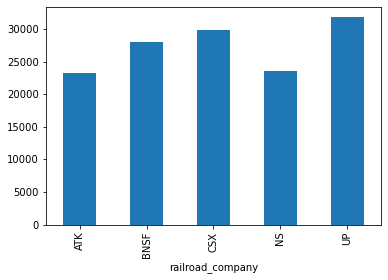

In [27]:
train.groupby('railroad_company').total_damage.median().plot(kind='bar')

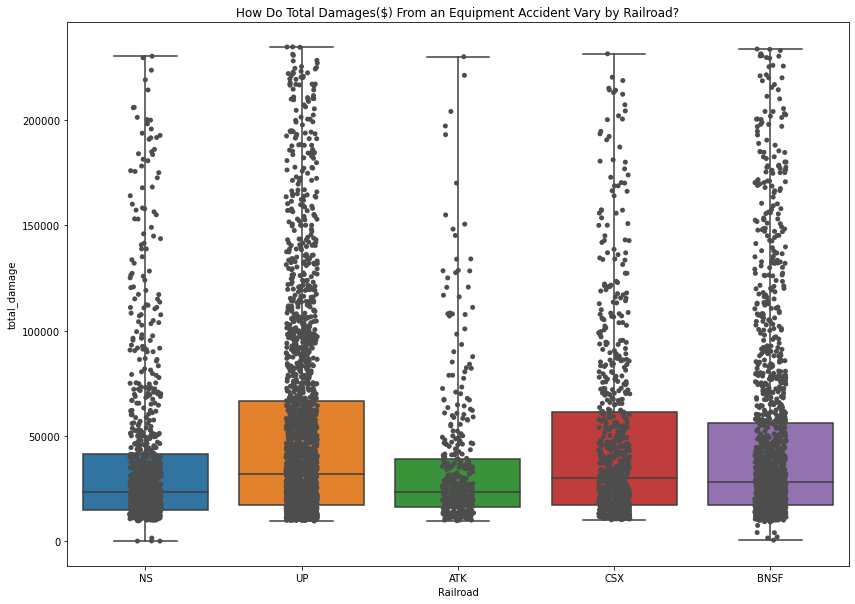

In [48]:
plt.figure(figsize=(14,10))



ax = sns.boxplot(x="railroad_company", y="total_damage", data=train,whis=np.inf )
ax = sns.stripplot(x="railroad_company", y="total_damage", data=train, color=".3")
ax.set_xlabel('Railroad')
plt.title('How Do Total Damages($) From an Equipment Accident Vary by Railroad?')


plt.show()

In [82]:
td_rr_df = test[['railroad_company', 'total_damage']]
td_rr_df.shape

(2020, 2)

In [83]:
td_rr_df.to_excel('total_damages_by_rr.xlsx')

**Does total_damage have the same distribution shape for each railroad?**

In [36]:
#Subset the UP observations
up_train = train[train.railroad_company == 'UP']
up_train

,railroad_company,accident_type,state_fips,temp,visibility,weather,train_speed,train_direction,train_weight,train_type,...,brakemen_onduty,region,typrr,lat,long,signal_type,date,season,state,year
6760,UP,1,35,89,2,2,4,4.0,0,8,...,1.0,5,1,32.344325,-108.684173,2,2019-08-05 13:45:00,Summer,NM,2019
3890,UP,1,16,50,2,1,4,3.0,4200,7,...,0.0,8,1,43.585991,-116.568469,2,2013-04-14 20:08:00,Spring,ID,2013
6062,UP,1,22,57,2,2,10,1.0,917,1,...,1.0,5,1,30.220090000000003,-93.142674,2,2020-12-22 10:10:00,Winter,LA,2020
417,UP,1,48,80,4,1,5,4.0,0,8,...,0.0,5,1,32.776494,-96.664986,2,2014-08-14 23:00:00,Summer,TX,2014
710,UP,1,48,40,4,3,5,1.0,3190,4,...,0.0,5,1,30.0018,-97.150144,2,2015-01-01 23:30:00,Winter,TX,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,UP,1,22,65,1,1,19,2.0,13317,1,...,0.0,5,1,32.565086,-91.988163,1,2012-09-24 05:50:00,Fall,LA,2012
4735,UP,1,6,87,2,1,13,4.0,477,7,...,0.0,7,1,34.008074,-117.51511299999999,2,2020-10-04 13:30:00,Fall,CA,2020
33,UP,12,48,95,2,1,0,1.0,2370,1,...,0.0,5,1,29.71305,-95.256175,2,2012-07-26 15:45:00,Summer,TX,2012
4228,UP,1,6,46,4,1,9,4.0,5670,1,...,0.0,7,1,38.710587,-121.331026,2,2015-01-05 17:55:00,Winter,CA,2015


<AxesSubplot:>

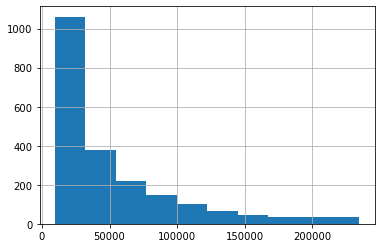

In [38]:
#View the dist of damages for UP
up_train.total_damage.hist()

<AxesSubplot:>

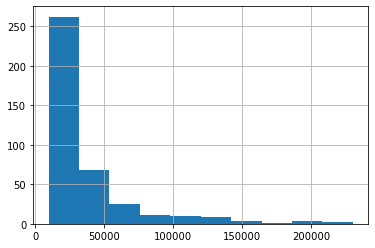

In [39]:
#Subset ATK
atk_train = train[train.railroad_company == 'ATK']

#View the Dist of Damages for ATK
atk_train.total_damage.hist()

**Explore Using crosstabs**

In [21]:
pd.crosstab(train.state, train.railroad_company, normalize=True, margins=True)

railroad_company,ATK,BNSF,CSX,NS,UP,All
state,,,,,,
AL,0.000776,0.002173,0.009624,0.014281,0.000000,0.026855
AR,0.000155,0.002018,0.000000,0.000000,0.018473,0.020646
AZ,0.000155,0.004967,0.000000,0.000000,0.007296,0.012419
CA,0.009624,0.022819,0.000000,0.000000,0.037721,0.070165
CO,0.000310,0.011177,0.000000,0.000000,0.008693,0.020180
CT,0.001863,0.000000,0.000155,0.000000,0.000000,0.002018
DC,0.004036,0.000000,0.000000,0.000000,0.000000,0.004036
DE,0.002484,0.000000,0.000310,0.000621,0.000000,0.003415
FL,0.002639,0.000000,0.007762,0.000931,0.000000,0.011332


In [ ]:
#View a crosstab of equip accidents by rr and state
rr_inc_by_state = pd.crosstab(train.state, train.railroad_company, margins=True)

In [ ]:
#Visualize Accidents by state
plt.figure(figsize=(16, 12))
rr_inc_by_state.All.plot(kind='bar', title="Which states have the most equipment rail accidents?")
plt.show()


**Takeaways:**
   - UP equipment accidents result in higher median total damages
   - Temperature spread is varied by railroad...Is this beacuse certain railroads operate in more specific climates?
   - Accident type should be a categorical value
   - Amtrak trains travel at higher speeds than other Railroads
   - BNSF accidents seem to incur > track damages on average
   - Amtrak incidents are missing train weight data
   - Texas has the most amount of equipment accidents than other states. Accounting for 14% of all accidents reported.

---

**Equipment Multivariate Exploration**

**Do Mean Total Damages Vary By the State in Which the Accident Occured?**

In [56]:
up_inc = train[train.railroad_company == 'UP']
up_inc.shape

(2112, 35)

In [58]:
up_inc.head()

,railroad_company,accident_type,state_fips,temp,visibility,weather,train_speed,train_direction,train_weight,train_type,...,brakemen_onduty,region,typrr,lat,long,signal_type,date,season,state,year
6760,UP,1,35,89,2,2,4,4.0,0,8,...,1.0,5,1,32.344325,-108.684173,2,2019-08-05 13:45:00,Summer,NM,2019
3890,UP,1,16,50,2,1,4,3.0,4200,7,...,0.0,8,1,43.585991,-116.568469,2,2013-04-14 20:08:00,Spring,ID,2013
6062,UP,1,22,57,2,2,10,1.0,917,1,...,1.0,5,1,30.220090000000003,-93.142674,2,2020-12-22 10:10:00,Winter,LA,2020
417,UP,1,48,80,4,1,5,4.0,0,8,...,0.0,5,1,32.776494,-96.664986,2,2014-08-14 23:00:00,Summer,TX,2014
710,UP,1,48,40,4,3,5,1.0,3190,4,...,0.0,5,1,30.0018,-97.150144,2,2015-01-01 23:30:00,Winter,TX,2015


In [61]:
up_inc_tx = up_inc[up_inc.state == ' TX']
up_inc_tx.shape

(557, 35)

<AxesSubplot:>

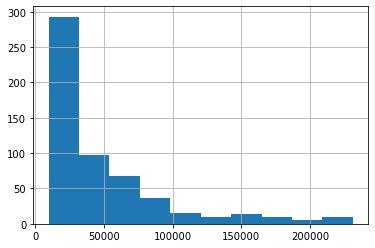

In [62]:
up_inc_tx.total_damage.hist()

In [51]:
up_tx_inc.total_damage.mean()

nan

<Figure size 1440x1152 with 0 Axes>

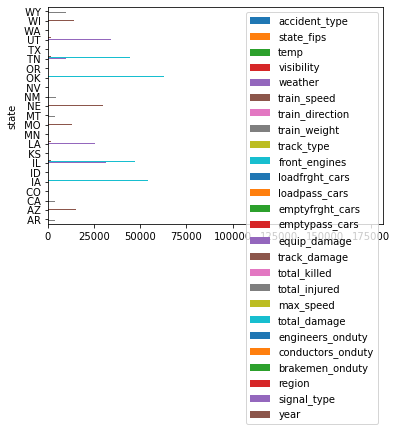

In [68]:
plt.figure(figsize=(20,16))
up_inc.groupby('state').mean('total_damage').plot(kind='barh')
plt.show()

In [ ]:
sns.pairplot(data = train, hue = 'railroad_company', 
             x_vars = ["train_type", "cause", "typrr", "accident_type"],
             y_vars = ["train_speed","train_weight", "equip_damage", "track_damage"])

**Takeaways**
   - Amtrak trains go faster than non amtrck trains.
   - Pairplot seems to confer that BNSF equipment accidents result in > track damages. 

In [ ]:
"temp",
                        "train_speed",
                        "train_weight",
                        "equip_damage",
                        "track_damage","total_killed", "total_injured", "max_speed", "total_damage"

In [ ]:
sns.pairplot(data = train, hue = 'railroad_company', 
             x_vars = ["train_type", "train_speed",
                        "max_speed", "accident_type"],
             y_vars = ["track_damage","total_killed", "total_injured", "total_damage"])

**Takeaways:**
   - Amtrak seems to be the exception for the observation that the > the train speed, the > the track damage.
   - Conversely, the greater the train speed for an Amtrak train, the > total_injured
   - Equipment rail incidents result in higher rates of injuries than in deaths

In [ ]:
sns.heatmap(train[["temp", "train_speed","track_damage","total_killed", "total_injured", "max_speed", "total_damage"]].corr(), cmap='Blues', annot=True)
plt.show()

**Takeaways**
   - The most interesting thing here is that total_injured is fairly correlated with total_damaged

---

## Questions from Exploration to Explore With Statistical Testing

**Do BNSF Equipment Incidents Result in Higher Track Damages than other Railroad Equipment Incidents?**

I am using a mann-whitney u test to analyze this due to the fact that track_damage is not normally distirbuted<br>
**H<sub>o</sub>: BNS equipment accidents do not result in higher track damages than other Railroad equipment accidents.<br>
H<sub>a</sub>: BNS equipment accidents do result in higher track damages**

In [40]:
#Set confidence interval and alpha for Mann-Whitney U Test due to the fact that track_damage is not normally dist
confidence_interval = 0.99
a = 1 - confidence_interval 

#Define the two samples where x1 is BNSF Railroad accidents and x2 non-BNSF railroad accidents
x1 = train[train.railroad_company == 'BNSF'].track_damage
x2 = train[train.railroad_company != 'BNSF'].track_damage

#Run the test
t, p = stats.mannwhitneyu(x1, x2, alternative='two-sided')

#print results
print(f'The mannwhitneyu statistic is:{t} and the p-value is {p}')

if p < a:
    print('We reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis')

The mannwhitneyu statistic is:3264148.5 and the p-value is 0.003858144840071176
We reject the null hypothesis.


**Do Amtrak Equipment Incidents Result in Higher Total Damages than other Railroad Equipment Incidents?**

I am using a mann-whitney u test to analyze this due to the fact that total_damage is not normally distirbuted<br>
**H<sub>o</sub>: Amtrack equipment accidents do not result in higher total damages than other Railroad equipment accidents.<br>
H<sub>a</sub>: Amtrack equipment accidents do result in higher total damages**

In [73]:
#Set confidence interval and alpha for Mann-Whitney U Test due to the fact that total_damage is not normally dist
confidence_interval = 0.99
a = 1 - confidence_interval 

#Define the two samples where x1 is Amtrak Railroad accidents and x2 non-Amtrak railroad accidents
x1 = train[train.railroad_company == 'ATK'].total_damage
x2 = train[(train.railroad_company != 'ATK')].total_damage

#Run the test
t, p = stats.mannwhitneyu(x1, x2, alternative='two-sided')

#print results
print(f'The mannwhitneyu statistic is:{t} and the p-value is {p}')

if p < a:
    print('We reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis')

The mannwhitneyu statistic is:897360.0 and the p-value is 5.987279367789933e-06
We reject the null hypothesis.


**Do UP Incidents Result in Higher Total Damages than other Railroad Equipment Incidents?**

I am using a mann-whitney u test to analyze this due to the fact that total_damage is not normally distirbuted<br>
**H<sub>o</sub>: UP equipment accidents do not result in higher total damages than other Railroad equipment accidents.<br>
H<sub>a</sub>: UP equipment accidents do result in higher total damages**

In [76]:
#Set confidence interval and alpha for Mann-Whitney U Test due to the fact that total_damage is not normally dist
confidence_interval = 0.99
a = 1 - confidence_interval 

#Define the two samples where x1 is Amtrak Railroad accidents and x2 non-Amtrak railroad accidents
x1 = train[train.railroad_company == 'UP'].total_damage
x2 = train[train.railroad_company != 'UP'].total_damage

#Run the test
t, p = stats.mannwhitneyu(x1, x2, alternative='two-sided')

#print results
print(f'The mannwhitneyu statistic is:{t} and the p-value is {p}')

if p < a:
    print('We reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis')

The mannwhitneyu statistic is:4085017.5 and the p-value is 8.08116939567745e-09
We reject the null hypothesis.


**Is train_speed a effective feature for classifying railroad involved in an equipment accident?**

In [43]:
#Set confidence interval and alpha for Mann-Whitney U Test due to the fact that total_damage is not normally dist
confidence_interval = 0.95
a = 1 - confidence_interval 

#Define the two samples where x1 is Amtrak Railroad accidents and x2 non-Amtrak railroad accidents
x1 = train[train.railroad_company == 'ATK'].train_speed
x2 = train[train.railroad_company != 'ATK'].train_speed

#Run the test
t, p = stats.mannwhitneyu(x1, x2, alternative='two-sided')

#print results
print(f'The mannwhitneyu statistic is:{t} and the p-value is {p}')

if p < a:
    print('We reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis')

The mannwhitneyu statistic is:1587002.0 and the p-value is 4.356056689452762e-69
We reject the null hypothesis.


**Is train_type related to railroad?**

Chi Squared Test for examining the relationship between two categorical variables<br>
**H<sub>o</sub>: Train type is independent of railroad.<br>
H<sub>a</sub>: Train type has dependent on railroad.**

In [34]:
observed = pd.crosstab(train.railroad_company, train.train_type)
observed

train_type,1,2,3,4,5,6,7,8,9,A,B
railroad_company,,,,,,,,,,,
ATK,0,260,1,6,0,1,38,58,2,4,25
BNSF,703,0,0,6,5,18,598,106,39,18,1
CSX,426,1,0,2,20,52,223,15,2,4,0
NS,531,1,0,10,5,19,274,62,1,7,0
UP,1118,0,0,30,30,12,741,141,3,37,0


In [35]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[   0  260    1    6    0    1   38   58    2    4   25]
 [ 703    0    0    6    5   18  598  106   39   18    1]
 [ 426    1    0    2   20   52  223   15    2    4    0]
 [ 531    1    0   10    5   19  274   62    1    7    0]
 [1118    0    0   30   30   12  741  141    3   37    0]]
---
Expected

[[1.94008133e+02 1.82973833e+01 6.98373409e-02 3.77121641e+00
  4.19024045e+00 7.12340877e+00 1.30875177e+02 2.66778642e+01
  3.28235502e+00 4.88861386e+00 1.81577086e+00]
 [7.33792786e+02 6.92057992e+01 2.64144272e-01 1.42637907e+01
  1.58486563e+01 2.69427157e+01 4.95006365e+02 1.00903112e+02
  1.24147808e+01 1.84900990e+01 6.86775106e+00]
 [3.65914074e+02 3.45102546e+01 1.31718529e-01 7.11280057e+00
  7.90311174e+00 1.34352900e+01 2.46840523e+02 5.03164781e+01
  6.19077086e+00 9.22029703e+00 3.42468175e+00]
 [4.46955446e+02 4.21534653e+01 1.60891089e-01 8.68811881e+00
  9.65346535e+00 1.64108911e+01 3.01509901e+02 6.14603960e+01
  7.56188119e+00 1.12623762e+01 4.18316832e+0

**Takeaway:**
- The chi squared test revealed there is likely a significant relationship between the type of train and the railroad.
- Type of train would be a good feature for predicting railroad company, but it may result in too much coliniarity

---

**What features should be carried over to modeling for Equipment Rail Accidents?**
- track_damage
- state_fips
- total_damage
- weather
- equip_damage
- season
- railroad_company
- year

In [ ]:
df.columns.to_list()

---

## Explore HWY Rail

**Acquire HWY Rail**

In [ ]:
hwy_df = acquire.get_hwyrail()
hwy_df.head()

**Prep HWY Rail**

In [ ]:
hwy_df = prepare.prep_hwy_df(hwy_df)
hwy_df.shape

**Explore HWY Rail Univariate**

In [ ]:
hwy_df.info()

In [ ]:
cat_vars = ["railroad_company", "station", "county", "city", "vehicle_type", "vehicle_direction", "position",
           "hazmat_entity", "weather", "train_type", "track_type"]
quant_vars = ["vehicle_speed", "temp", "total_killed", "total_injured"]

In [ ]:
hwy_df.columns.to_list()

**Is there a relationship between train length and the railroad company?**